## 1. Importing the important packages 
<hr>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

## 2. Loading the dataset 
<hr>

In [17]:
training_df = pd.read_csv("heart_attack.csv")
training_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,non-anginal apin,145,233,1,hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,male,atypical angina,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,female,typical angina,130,204,0,hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,male,typical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,female,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1


<ul>
<li>[age]Age (Years)</li>
<li>[sex]Sex (Male or Female)</li>
<li>[cp]Chest pain type</li>
<li>[trestbps]Resting blood pressure in mm Hg</li>
<li>[chol]Serum cholestoral in mg/dl</li>
<li>[fbs]Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
<li>[restecg]Resting electrocardiographic results</li>
<li>[thalach]Maximum heart rate </li>
<li>[exang]Exercise induced angina (1 = yes; 0 = no)</li>
<li>[oldpeak]ST depression induced by exercise relative to rest</li>
<li>[slope]The slope of the peak exercise ST segment</li>
<li>[ca]Number of major vessels (0-3) colored by flourosopy</li>
<li>[thal]Normal, fixed defect, reversable defect</li>

<ul>

## 3. Exploring the dataset
<hr>

In [18]:
training_df.describe()

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [19]:
training_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       303 non-null    int64  
 12  thall     303 non-null    object 
 13  output    303 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 33.3+ KB


## 4. Preprocessing the data
<hr>

#### 4.1. Data Cleaning
<hr>

In [20]:
def cleaning_df(df):
    df["sex"].replace({"male": 1, "female": 2}, inplace = True)
    df["cp"].replace({"asymptomatic": 0, "typical angina": 1, "atypical angina": 2, "non-anginal apin": 3}, inplace = True)
    df["restecg"].replace({"hypertrophy": 0, "normal": 1, "having ST-T wave abnormality": 2}, inplace = True)
    df["slp"].replace({"downsloping": 0, "flat": 1, "upsloping": 2}, inplace = True)
    df["thall"].replace({"fixed defect": 1, "normal": 2, "reversable defect": 3, "0": 0}, inplace = True)
    return df

In [21]:
training_df = cleaning_df(training_df)
training_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,2,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,2,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 4.2. Data Visualization
<hr>

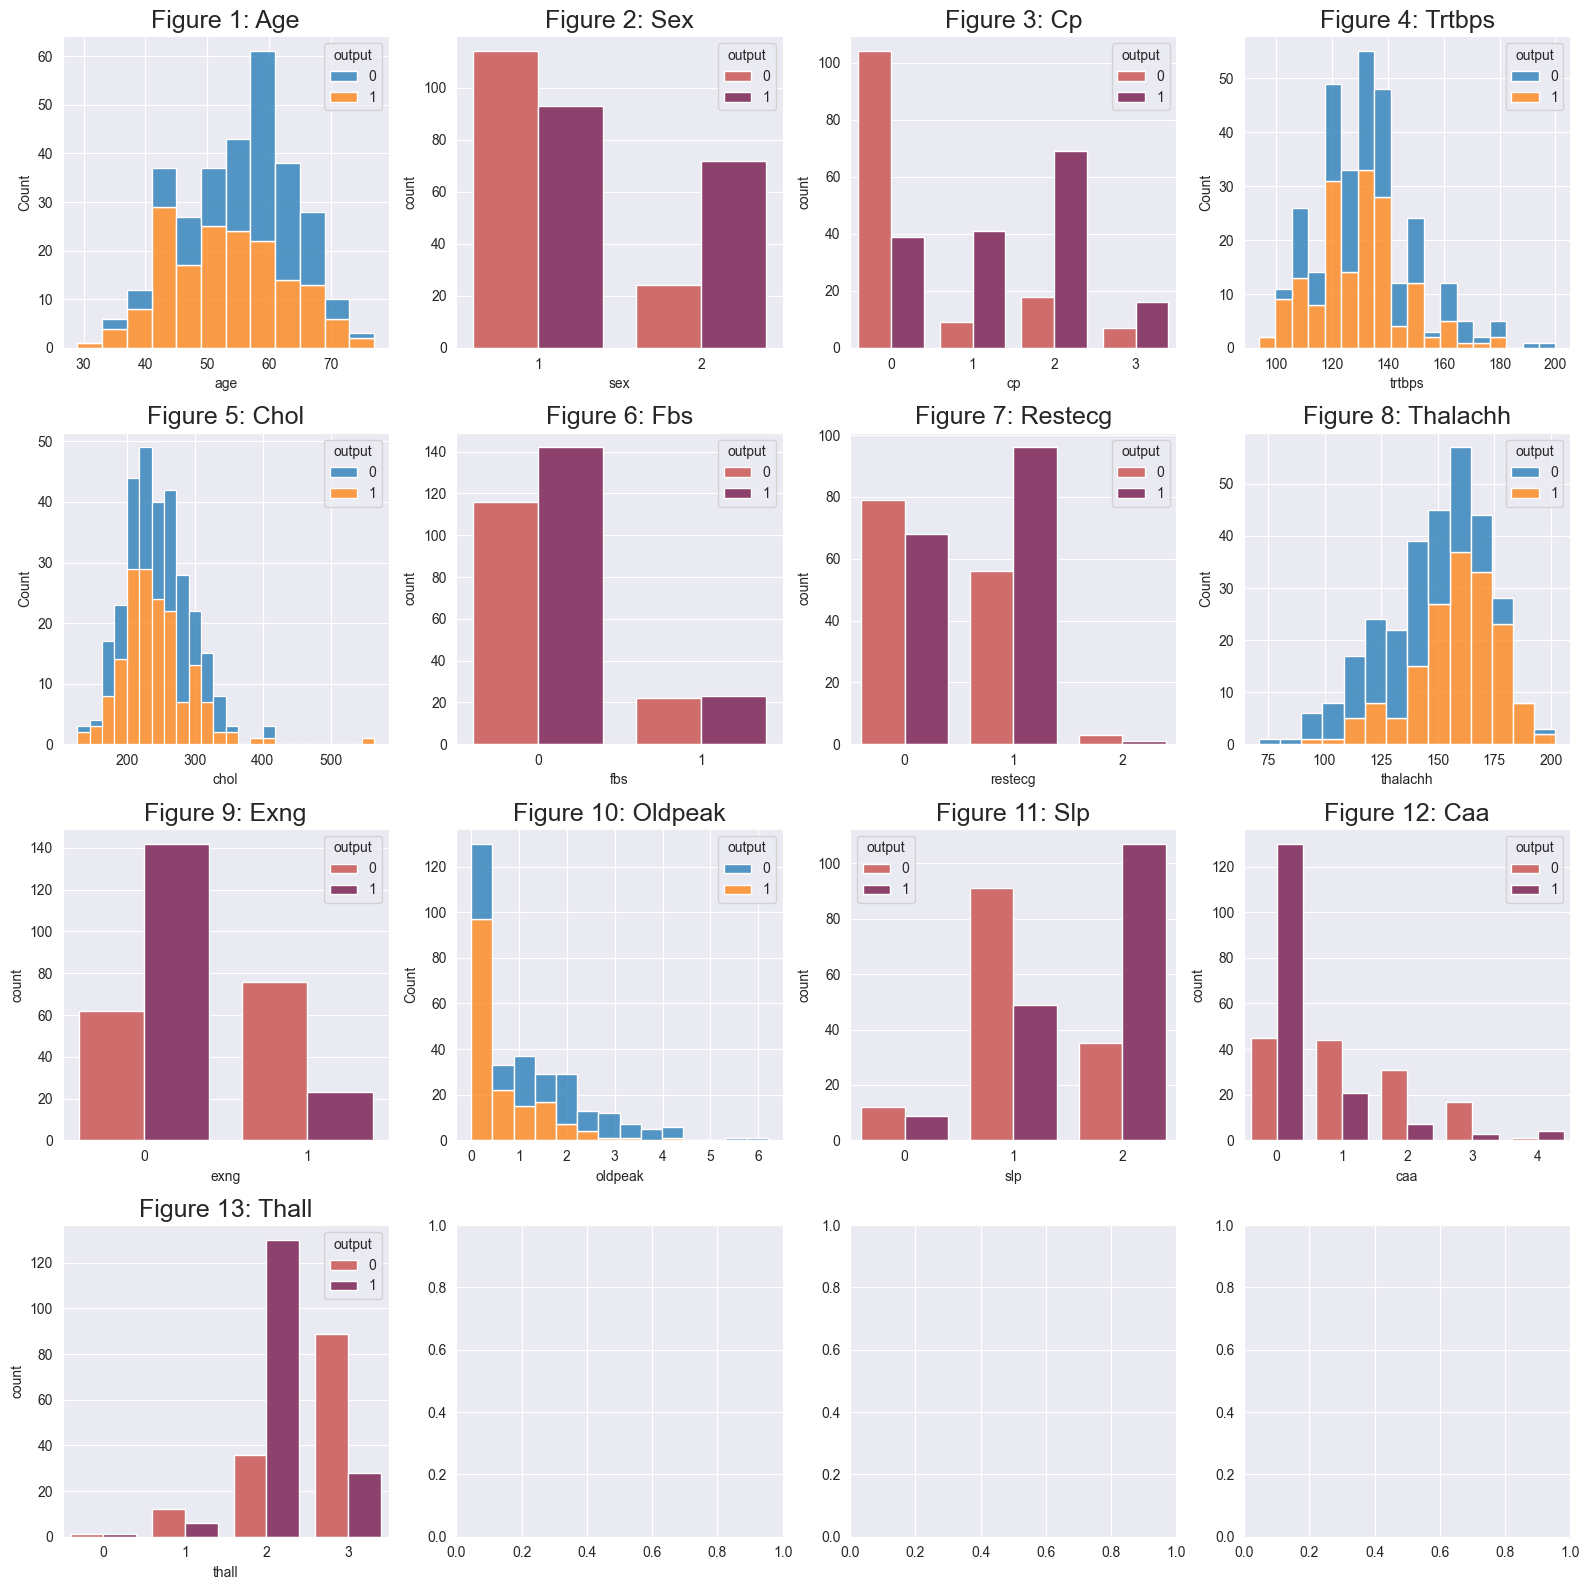

In [22]:
fig, axes = plt.subplots(figsize=(16,16), nrows = 4, ncols = 4)

sns.set_style("darkgrid")

for i, col in enumerate(training_df.drop(["output"], axis = 1).columns):
    if training_df[col].dtype != float and len(training_df[col].unique()) <= 5:
        sns.countplot(data = training_df,
                     x= col,
                     hue= "output",
                     palette= "flare",
                     ax = axes[int(i / 4), i % 4]).set_title("Figure " + str(i + 1) + ": " + col.capitalize(), fontsize=18)
    else:
        sns.histplot(data = training_df,
                     x= col,
                     hue = "output",
                     multiple='stack',
                     ax = axes[int(i / 4), i % 4]).set_title("Figure " + str(i + 1) + ": " + col.capitalize(), fontsize=18)
    plt.tight_layout()

## 5. Building and training the model
<hr>

#### 5.1. Split data
<hr>

In [23]:
X, y= training_df.drop(["output"], axis = 1), training_df["output"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.33,
                                                    random_state= 42)

#### 5.2. Training
<hr>

#### 5.2.1. Training models
<hr>

In [24]:
models = [DecisionTreeClassifier(random_state=0),
          GaussianNB(),
          SVC(random_state=0),
          RandomForestClassifier(random_state= 0),
          AdaBoostClassifier(random_state= 0)]

models_preformance = {}

for model in models:
    algorithm = model.__class__.__name__
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    models_preformance.update({algorithm: { "Training Time (ms)": (end_time - start_time) * 100, "Training Score": model.score(X_train, y_train)}})

#### 5.2.2. Training KNN models with different values of K 
<hr>

In [25]:
knn_models = []

for i in range(1, 51):
    if i % 10 == 0 or i == 5 or i == 3 or i == 1:        
        model = KNeighborsClassifier(n_neighbors= i)
        start_time = time()
        model.fit(X_train, y_train)
        end_time = time()
        models_preformance.update({"KNN (K=" + str(i) + ")": { "Training Time (ms)": (end_time - start_time) * 100, "Training Score": model.score(X_train, y_train)}})
        knn_models.append(model)

#### 5.3. Evaluation Model
<hr>

#### 5.3.1. Evalution by using random split data
<hr>

In [26]:
for model in models + knn_models:
    algorithm = model.__class__.__name__
    if model.__class__.__name__ == "KNeighborsClassifier":
        algorithm = "KNN (K=" + str(model.n_neighbors) + ")"

    start_time = time()
    accuracy = model.score(X_test, y_test)
    end_time = time()
    models_preformance.update({algorithm: { **models_preformance[algorithm], **{"Prediction Time (ms)": (end_time - start_time) * 100, "Accuracy": accuracy}}})    
    

In [27]:
for model in models + knn_models:
    algorithm = model.__class__.__name__
    if model.__class__.__name__ == "KNeighborsClassifier":
        algorithm = "KNN (K=" + str(model.n_neighbors) + ")"
    
    start_time = time()
    scores = cross_val_score(model, X, y, cv = 10)
    end_time = time()
    models_preformance.update({algorithm: { **models_preformance[algorithm], **{"Cross Validation Time (ms)": (end_time - start_time) * 100, "Cross Validation Score": np.mean(scores)}}})

## 6. Comparing the exprimental results
<hr>

In [28]:
df = pd.DataFrame(models_preformance)
df = df.transpose()
df

,Training Time (ms),Training Score,Prediction Time (ms),Accuracy,Cross Validation Time (ms),Cross Validation Score
DecisionTreeClassifier,0.300097,1.000000,0.199890,0.75,2.904463,0.778387
GaussianNB,0.150824,0.832512,0.100183,0.83,2.304077,0.805054
SVC,0.200009,0.665025,0.199962,0.72,4.362249,0.660430
RandomForestClassifier,8.619761,1.000000,0.679708,0.82,92.574859,0.821720
AdaBoostClassifier,4.563761,0.926108,0.451207,0.79,48.926759,0.811290
KNN (K=1),0.100374,1.000000,0.300574,0.59,2.872109,0.594516
KNN (K=3),0.100374,0.788177,0.200152,0.62,3.420496,0.627204
KNN (K=5),0.200105,0.768473,0.299811,0.66,2.954340,0.653548
KNN (K=10),0.150657,0.684729,0.200081,0.67,2.884245,0.640753
KNN (K=20),0.100160,0.704433,0.332499,0.71,3.114104,0.653548


## 7. Applying Ensemble learning 
<hr>

In [29]:
def weighted_model(X_test):
    best_models_df = df[df["Cross Validation Score"] >= 0.80].sort_values(by=["Cross Validation Score"], ascending= False)
    
    weights = []
    weighted_models = []
    preds = 0
    
    sum_models = np.sum(best_models_df["Cross Validation Score"])
    for index, row in best_models_df.iterrows():
        for model in models:
            if(model.__class__.__name__ == index):
                weighted_models.append(model)
            
        weights.append(row["Cross Validation Score"] / sum_models)
        
        
    for i, model in enumerate(weighted_models):
        preds += weights[i] * model.predict(X_test)
            
    preds = np.round(preds)
    
    return preds

In [30]:
accuracy_score(y_test, weighted_model(X_test))

0.85